In [28]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import sklearn

# ccba

In [29]:
ccba = pd.read_csv('meargedata/ccba.csv')
ccba = ccba[['cust_id','lupay','usgam','clamt','csamt','inamt','cucsm','cucah']]
ccba.to_csv('ccba.csv', index = False)
ccba

,cust_id,lupay,usgam,clamt,csamt,inamt,cucsm,cucah
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,0,0,0,0,0,0,0
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca...,1,0,0,0,0,1,0
2,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...,0,0,0,0,0,0,0
3,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffc...,0,1,0,0,0,0,0
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4740,ffa5bcc6f88df5c33e809da4daa54de0031803f37d8f11...,0,0,0,0,0,0,0
4741,ffae7fef923c78298cd647a3d573e48cc1404b07ac794a...,0,0,0,0,0,0,0
4742,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b...,0,0,0,0,0,0,0
4743,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,1,1,0,0,0,1,0


# cdtx

In [30]:
cdtx = pd.read_csv('meargedata/cdtx.csv')
#cdtx = cdtx.astype(int)

cdtx.loc[ cdtx['times'] <= 100, 'times' ] = 0 
cdtx.loc[ (cdtx['times'] > 100) & (cdtx['times'] <= 500), 'times' ] = 1 
cdtx.loc[ (cdtx['times'] > 500) & (cdtx['times'] <= 1000), 'times' ] = 2 
cdtx.loc[ cdtx['times'] > 1000, 'times' ] = 3
cdtx['times'].value_counts()

cdtx['amt'] = cdtx['amt'].astype(int)
cdtx['amt'].value_counts().sort_index().tail(50)
cdtx.loc[ cdtx['amt'] <= 10000, 'amt' ] = 0 
cdtx.loc[ (cdtx['amt'] > 10000) & (cdtx['amt'] <= 100000), 'amt' ] = 1 
cdtx.loc[ (cdtx['amt'] > 100000) & (cdtx['amt'] <= 500000), 'amt' ] = 2 
cdtx.loc[ cdtx['amt'] > 500000, 'amt' ] = 3
cdtx['amt'].value_counts()
cdtx.to_csv('cdtx.csv', index = False)
cdtx

,cust_id,country,cur_type,amt,times
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,1.000000,1.000000,0,0
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca...,0.991713,1.000000,1,1
2,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...,1.000000,1.000000,0,1
3,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffc...,0.026059,0.990228,0,2
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,1.000000,1.000000,0,0
...,...,...,...,...,...
3940,ffa5bcc6f88df5c33e809da4daa54de0031803f37d8f11...,1.000000,1.000000,0,0
3941,ffae7fef923c78298cd647a3d573e48cc1404b07ac794a...,1.000000,1.000000,0,0
3942,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b...,1.000000,1.000000,0,1
3943,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,0.955598,0.998069,0,2


# dp_final

In [31]:
dp_final = pd.read_csv('meargedata/dp_final.csv')
dp_final

dp_final['tx_amt_total'] = dp_final['tx_amt_total'].astype(int)
dp_final['tx_amt_total'].value_counts().sort_index().tail(50)
dp_final.loc[ dp_final['tx_amt_total'] <= 100000, 'tx_amt_total' ] = 0 
dp_final.loc[ (dp_final['tx_amt_total'] > 100000) & (dp_final['tx_amt_total'] <= 500000), 'tx_amt_total' ] = 1 
dp_final.loc[ (dp_final['tx_amt_total'] > 500000) & (dp_final['tx_amt_total'] <= 10000000), 'tx_amt_total' ] = 2 
dp_final.loc[ dp_final['tx_amt_total'] > 10000000, 'tx_amt_total' ] = 3
dp_final['tx_amt_total'].value_counts()

dp_final['num_of_tx_date'].value_counts().sort_index().head(50)
dp_final.loc[ dp_final['num_of_tx_date'] <= 50, 'num_of_tx_date' ] = 0 
dp_final.loc[ (dp_final['num_of_tx_date'] > 50) & (dp_final['num_of_tx_date'] <= 100), 'num_of_tx_date' ] = 1
dp_final.loc[ (dp_final['num_of_tx_date'] > 100) & (dp_final['num_of_tx_date'] <= 200), 'num_of_tx_date' ] = 2
dp_final.loc[ (dp_final['num_of_tx_date'] > 200), 'num_of_tx_date' ] = 3 
dp_final['num_of_tx_date'].value_counts()

dp_final = dp_final.drop ( 'CR' , axis=1 )
dp_final = dp_final.drop ( 'DB' , axis=1 )
dp_final.to_csv('dp_final.csv', index = False)
dp_final

,cust_id,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,2,1,1,3,2
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,1,1,2,0
2,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,1,1,1,2,0
3,01c705b457297805c1c08137cb3adb164b8f393c265db2...,1,1,1,3,3
4,022bec0a12b56285bf12c49ba1512c0acdbf4176a30d96...,1,1,1,2,1
...,...,...,...,...,...,...
6191,ffae7fef923c78298cd647a3d573e48cc1404b07ac794a...,1,1,1,0,2
6192,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b...,1,1,1,2,0
6193,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,1,1,1,3,1
6194,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,1,1,1,2,0


# remit

In [32]:
remit = pd.read_csv('meargedata/remit.csv')

remit['remit_num'].value_counts().sort_index()
remit.loc[ remit['remit_num'] <= 10, 'remit_num' ] = 0 
remit.loc[ (remit['remit_num'] > 10) & (remit['remit_num'] <= 50), 'remit_num' ] = 1
remit.loc[ (remit['remit_num'] > 50) & (remit['remit_num'] <= 100), 'remit_num' ] = 2
remit.loc[ (remit['remit_num'] > 100), 'remit_num' ] = 3
remit['remit_num'].value_counts().sort_index()
remit = remit.drop ( 'trans_date' , axis=1 )

remit['trade_amount_usd'] = remit['trade_amount_usd'].astype(int)
remit['trade_amount_usd'].value_counts().sort_index().tail(50)
remit.loc[ remit['trade_amount_usd'] <= 10000, 'trade_amount_usd' ] = 0 
remit.loc[ (remit['trade_amount_usd'] > 10000) & (remit['trade_amount_usd'] <= 100000), 'trade_amount_usd' ] = 1
remit.loc[ (remit['trade_amount_usd'] > 100000) & (remit['trade_amount_usd'] <= 200000), 'trade_amount_usd' ] = 2
remit.loc[ (remit['trade_amount_usd'] > 200000), 'trade_amount_usd' ] = 3
remit['trade_amount_usd'].value_counts().sort_index().tail(50)
remit.to_csv('remit.csv', index = False)
remit

,cust_id,remit_num,trans_no,trade_amount_usd
0,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...,0,4.000000,3
1,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,0,2.200000,2
2,0068c614b131d745d71672044f1cc660ca30dd71e48338...,0,2.666667,3
3,00b342a67f967d662c851893d49d3da0716041fac5fa90...,0,4.000000,1
4,00eabc23fbb38516c8e9a13f3a8f8d00579ff7baeb2ec8...,0,4.000000,1
...,...,...,...,...
1139,ff38c93051cf7c0175c67f5171271d4b8c8bb40533df65...,0,4.000000,0
1140,ff483c74ef2977bfcf04be0a79363af72d1812aac9ce1f...,1,0.000000,0
1141,ff4fa0c71df2a8a9074c1b8ad537e0f15c93ad16e1165e...,0,4.000000,2
1142,ff6b0040005b54f4b7955942e74a0a9ec466abb2a017a5...,1,0.000000,1


# Combine Training Data

In [33]:
#合併訓練資料
train2 = pd.merge(ccba,cdtx,how='outer')
train3 = pd.merge(dp_final,remit,how='outer')
train4 = pd.merge(train2,train3,how='outer')
train4 = train4.fillna(-1)
train4

,cust_id,lupay,usgam,clamt,csamt,inamt,cucsm,cucah,country,cur_type,amt,times,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date,remit_num,trans_no,trade_amount_usd
0,0015cc01f553512007705edf855baa16f1b57a16fb107e...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.991713,1.000000,1.0,1.0,2.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0
2,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,4.0,3.0
3,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffc...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.026059,0.990228,0.0,2.0,2.0,1.0,1.0,3.0,1.0,-1.0,-1.0,-1.0
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,3.0,3.0,0.0,2.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626,ff6b0040005b54f4b7955942e74a0a9ec466abb2a017a5...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0
6627,ff704ab35a1deb83bd7d1b2bf14fc525800b6e7e9c1595...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,1.0,1.0,1.0,3.0,0.0,-1.0,-1.0,-1.0
6628,ff965074f06b495209d3cb2d4870aec65577849c226b0b...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,1.0,1.0,1.0,3.0,2.0,-1.0,-1.0,-1.0
6629,fff94defcc33daab190e702926d583f6d805294354addb...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,1.0,1.0,1.0,3.0,3.0,-1.0,-1.0,-1.0


In [34]:
#訓練資料+train_x_alert_date
train_X = pd.read_csv('traindata/train_x_alert_date.csv')
public_X = pd.read_csv('traindata/public_x_alert_date.csv')
custinfo = pd.read_csv('traindata/public_train_x_custinfo_full_hashed.csv')
answer = pd.read_csv('traindata/train_y_answer.csv')

custinfo.loc[ custinfo['total_asset'] <= 100000, 'total_asset' ] = 0 
custinfo.loc[ (custinfo['total_asset'] > 100000) & (custinfo['total_asset'] <= 1000000), 'total_asset' ] = 1
custinfo.loc[ (custinfo['total_asset'] > 1000000) & (custinfo['total_asset'] <= 10000000), 'total_asset' ] = 2
custinfo.loc[ (custinfo['total_asset'] > 10000000), 'total_asset' ] = 3
custinfo['total_asset'].value_counts().sort_index()

train_X_data = pd.merge(train_X,custinfo)
train_X_data

,alert_key,date,cust_id,risk_rank,occupation_code,total_asset,AGE
0,171189,0,972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...,1,17.0,1.0,4
1,171202,0,a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...,3,12.0,2.0,2
2,171599,0,3433ecc068ed1c9e2f5037cab5d42d7b901e9bd624c1fb...,1,12.0,1.0,4
3,171737,0,a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...,3,14.0,2.0,4
4,171142,0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,1.0,3
...,...,...,...,...,...,...,...
23901,352132,364,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,2.0,3
23902,352125,364,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,1.0,3
23903,352080,364,1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...,2,9.0,0.0,6
23904,352075,364,9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...,3,3.0,1.0,6


In [35]:
train_data = pd.merge(train_X_data,train4,how='left')
train_data = train_data.fillna(-1)
train_data = pd.merge(train_data,answer)
train_data.isnull().sum()
train_data = train_data.drop('cust_id',axis = 1)
train_data = train_data.drop('date',axis = 1)

train_data

,alert_key,risk_rank,occupation_code,total_asset,AGE,lupay,usgam,clamt,csamt,inamt,...,times,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date,remit_num,trans_no,trade_amount_usd,sar_flag
0,171189,1,17.0,1.0,4,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,0
1,171202,3,12.0,2.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,2.0,0.0,1.0,3.0,1.0,-1.0,-1.0,-1.0,0
2,171599,1,12.0,1.0,4,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,0
3,171737,3,14.0,2.0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,3.0,-1.0,-1.0,-1.0,0
4,171142,3,12.0,1.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,3.0,2.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,352132,1,19.0,2.0,3,1.0,1.0,0.0,0.0,0.0,...,3.0,1.0,1.0,1.0,3.0,1.0,0.0,4.0,3.0,0
23902,352125,3,19.0,1.0,3,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,0.0,1.0,3.0,0.0,0.0,4.0,1.0,0
23903,352080,2,9.0,0.0,6,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,0.0,1.0,3.0,0.0,1.0,4.0,0.0,0
23904,352075,3,3.0,1.0,6,0.0,0.0,0.0,0.0,0.0,...,-1.0,1.0,1.0,1.0,3.0,3.0,-1.0,-1.0,-1.0,0


# Testdata

In [36]:
public_X_data = pd.merge(public_X,custinfo)
public_X_data

test_data = pd.merge(public_X_data,train4,how='left')
test_data = test_data.fillna(-1)
test_data = test_data.drop('cust_id',axis = 1)
test_data = test_data.drop('date',axis = 1)

test_data.isnull().sum()
test_data

,alert_key,risk_rank,occupation_code,total_asset,AGE,lupay,usgam,clamt,csamt,inamt,...,amt,times,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date,remit_num,trans_no,trade_amount_usd
0,352342,1,17.0,1.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3.0,3.0,2.0,0.000000,1.0
1,352866,1,12.0,1.0,4,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,1.0,1.0,1.0,2.0,0.0,-1.0,-1.000000,-1.0
2,352696,1,2.0,1.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,0.000000,1.0
3,352330,1,19.0,1.0,4,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,2.0,2.0,-1.0,-1.000000,-1.0
4,352683,3,17.0,0.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.153846,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,364472,3,19.0,2.0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,0.075000,1.0
1841,364788,2,19.0,0.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,2.0,1.0,1.0,2.0,2.0,0.0,4.000000,1.0
1842,364673,1,19.0,1.0,6,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,2.0,1.0,1.0,3.0,1.0,1.0,0.000000,1.0
1843,364626,1,19.0,0.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,2.0,1.0,-1.0,-1.000000,-1.0


In [37]:
test1 = pd.read_csv('預測的案件名單及提交檔案範例.csv')
test = test1
test = test.drop('probability',axis = 1)
test = pd.merge(test,test_data,how='left')
test = pd.merge(test,train_data,how='left')
test = test.drop('alert_key',axis = 1)
test = test.drop('sar_flag',axis = 1)
test = test.fillna(-1)
test.to_csv('test.csv', index = False)

test_data = test_data.drop('alert_key',axis = 1)
test_data.to_csv('test_data.csv', index = False)
train_data = train_data.drop('alert_key',axis = 1)
train_data.to_csv('train_data.csv', index = False)

test

,risk_rank,occupation_code,total_asset,AGE,lupay,usgam,clamt,csamt,inamt,cucsm,...,amt,times,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date,remit_num,trans_no,trade_amount_usd
0,1.0,4.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,3.0,3.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.0,19.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0
4,1.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1.0,17.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0
3846,1.0,17.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0
3847,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3848,1.0,9.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,1.0,1.0,1.0,3.0,1.0,2.0,0.0,1.0


In [38]:
train_data

,risk_rank,occupation_code,total_asset,AGE,lupay,usgam,clamt,csamt,inamt,cucsm,...,times,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date,remit_num,trans_no,trade_amount_usd,sar_flag
0,1,17.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,0
1,3,12.0,2.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,2.0,0.0,1.0,3.0,1.0,-1.0,-1.0,-1.0,0
2,1,12.0,1.0,4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,0
3,3,14.0,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,3.0,-1.0,-1.0,-1.0,0
4,3,12.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,3.0,2.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,1,19.0,2.0,3,1.0,1.0,0.0,0.0,0.0,1.0,...,3.0,1.0,1.0,1.0,3.0,1.0,0.0,4.0,3.0,0
23902,3,19.0,1.0,3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,0.0,1.0,3.0,0.0,0.0,4.0,1.0,0
23903,2,9.0,0.0,6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,0.0,1.0,3.0,0.0,1.0,4.0,0.0,0
23904,3,3.0,1.0,6,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,1.0,1.0,1.0,3.0,3.0,-1.0,-1.0,-1.0,0


In [39]:
test_data

,risk_rank,occupation_code,total_asset,AGE,lupay,usgam,clamt,csamt,inamt,cucsm,...,amt,times,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date,remit_num,trans_no,trade_amount_usd
0,1,17.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3.0,3.0,2.0,0.000000,1.0
1,1,12.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,1.0,1.0,1.0,2.0,0.0,-1.0,-1.000000,-1.0
2,1,2.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,0.000000,1.0
3,1,19.0,1.0,4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,2.0,2.0,-1.0,-1.000000,-1.0
4,3,17.0,0.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.153846,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,3,19.0,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,0.075000,1.0
1841,2,19.0,0.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,2.0,1.0,1.0,2.0,2.0,0.0,4.000000,1.0
1842,1,19.0,1.0,6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,2.0,1.0,1.0,3.0,1.0,1.0,0.000000,1.0
1843,1,19.0,0.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,2.0,1.0,-1.0,-1.000000,-1.0


# model

In [40]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split

In [41]:
def build_model():
    model = Sequential()
    model.add(Dense(input_dim=23,units=40))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=50))
    model.add(Activation('relu'))
    model.add(Dense(units=20))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [42]:
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [43]:
dataset_data = train_data.drop('sar_flag', axis=1)
dataset_target = train_data['sar_flag']
x_train = dataset_data
dataset_target2 = train_data[['sar_flag']]
y_train = dataset_target2
dataset_data.shape, dataset_target.shape, dataset_target2.shape

((23906, 23), (23906,), (23906, 1))

In [44]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(x_train)
scaledFeatures
test=minmax_scale.fit_transform(test)

In [45]:
dataset_data

,risk_rank,occupation_code,total_asset,AGE,lupay,usgam,clamt,csamt,inamt,cucsm,...,amt,times,tx_type,cross_bank,ATM,tx_amt_total,num_of_tx_date,remit_num,trans_no,trade_amount_usd
0,1,17.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0
1,3,12.0,2.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,2.0,0.0,1.0,3.0,1.0,-1.0,-1.0,-1.0
2,1,12.0,1.0,4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0
3,3,14.0,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,2.0,3.0,-1.0,-1.0,-1.0
4,3,12.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3.0,2.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,1,19.0,2.0,3,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,3.0,1.0,1.0,1.0,3.0,1.0,0.0,4.0,3.0
23902,3,19.0,1.0,3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,0.0,1.0,3.0,0.0,0.0,4.0,1.0
23903,2,9.0,0.0,6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,0.0,1.0,3.0,0.0,1.0,4.0,0.0
23904,3,3.0,1.0,6,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,1.0,1.0,1.0,3.0,3.0,-1.0,-1.0,-1.0


In [46]:
dataset_target2

,sar_flag
0,0
1,0
2,0
3,0
4,0
...,...
23901,0
23902,0
23903,0
23904,0


In [47]:
#Train Model
model = build_model()
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])
#Evaluate training result
train_history = model.fit(scaledFeatures, y_train, validation_split=0.2,batch_size=50, epochs=25)
                          
score = model.evaluate(x=scaledFeatures, y=y_train)
print('\nTrain Loss', score[0])
print('\nTrain Acc:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 40)                960       
                                                                 
 activation_5 (Activation)   (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 100)               4100      
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 activation_7 (Activation)   (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 20)               

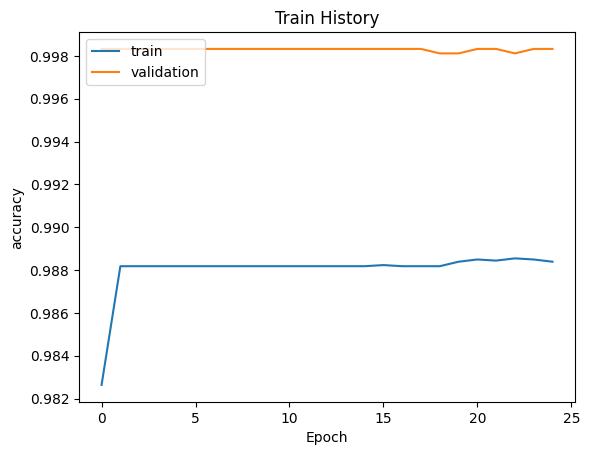

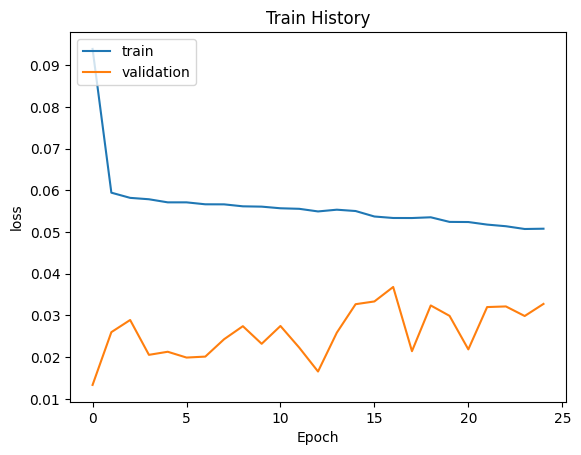

In [48]:
#Show Training Process
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

In [49]:
w,b = model.layers[0].get_weights()
print("weights = {}, \n\n biases= {}".format(w,b))

weights = [[-0.18720226 -0.03440185 -0.03654595  0.3326176   0.03644399  0.357243
  -0.215791    0.13088797  0.24796845 -0.04879016  0.04044564 -0.30537874
  -0.20103984  0.29731235  0.43760043  0.30051747 -0.2537649  -0.14194211
   0.15915535  0.06739348 -0.16295514 -0.24667443  0.43012607  0.2599038
  -0.18590617 -0.25670725  0.3669468   0.08754439 -0.13778313 -0.22742924
   0.34498677  0.5342804  -0.29168832  0.25756142  0.38354304  0.3547635
   0.5165542   0.14143415 -0.08051042 -0.21790774]
 [-0.4765305   0.34408182 -0.35907194  0.0895524  -0.04733109 -0.66416323
  -0.4834081  -0.07620773 -0.33673218  0.20149846 -0.36475942  0.21378915
  -0.03296046  0.10474993 -0.25909498  0.16907477  0.3576086   0.10901552
   0.28970653  0.19650848 -0.1131325   0.41172084  0.03455932 -0.14460272
  -0.2812995  -0.15017353  0.11992753  0.18294366  0.07081308 -0.08675463
  -0.1133146  -0.04463683  0.2737353   0.20573989 -0.07955165 -0.13626209
   0.2505186  -0.25039735 -0.29246742 -0.16019663]
 [ 0

In [50]:
probability=model.predict(test)

121/121 [==============================] - 0s 772us/step


In [51]:
probability = probability.flatten()
probability

array([0.01976074, 0.00041071, 0.00041071, ..., 0.00041071, 0.01345889,
       0.00041071], dtype=float32)

In [52]:
submission = pd.DataFrame({
    "alert_key":test1["alert_key"],
    "probability":probability
})
submission.to_csv("submission.csv",index=False)

# SVM

In [53]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)

svm.fit(x_train,y_train)

results=svm.predict(test)

SVM_submission = pd.DataFrame({
    "alert_key":test1["alert_key"],
    "probability":results
})
SVM_submission.to_csv('SVM_submission.csv', index = False)
results

C:\Users\Paul\anaconda3\envs\py38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Paul\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
from sklearn import  ensemble, preprocessing, metrics

forest = ensemble.RandomForestClassifier(n_estimators = 100)
y_train=y_train.squeeze()
forest_fit = forest.fit(x_train, y_train)

#test_y_predicted = forest.predict(X_test)
#accuracy = metrics.accuracy_score(y_test, test_y_predicted)

results=forest.predict(test)

RF_submission=pd.DataFrame({
    "alert_key":test1["alert_key"],
    "probability":results
})
RF_submission.to_csv('RF_submission.csv', index = False)
results

C:\Users\Paul\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)